# Clustering
The dating profiles

### Importing Libraries and Data

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

In [3]:
# Loading in the cleaned DF
with open("../Data-Gathering-Creation/profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,8,1,2,8,4,7,5
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,2,1,1,4,5,1,3
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,8,2,0,8,7,8,1
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,7,3,8,6,2,4,1
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,2,9,2,2,8,8,8
...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,5,8,8,0,8,0,0
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,9,2,2,8,2,3,2
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,6,3,2,8,6,5,8
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,8,6,5,3,4,9,4


## Scaling the Categories

In [4]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,0.888889,0.111111,0.222222,0.888889,0.444444,0.777778,0.555556
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,0.222222,0.111111,0.111111,0.444444,0.555556,0.111111,0.333333
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,0.888889,0.222222,0.000000,0.888889,0.777778,0.888889,0.111111
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,0.777778,0.333333,0.888889,0.666667,0.222222,0.444444,0.111111
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,0.222222,1.000000,0.222222,0.222222,0.888889,0.888889,0.888889
...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,0.555556,0.888889,0.888889,0.000000,0.888889,0.000000,0.000000
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,1.000000,0.222222,0.222222,0.888889,0.222222,0.333333,0.222222
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,0.666667,0.333333,0.222222,0.888889,0.666667,0.555556,0.888889
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,0.888889,0.666667,0.555556,0.333333,0.444444,1.000000,0.444444


## Vectorizing the Bios

In [5]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [6]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6236,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6237,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6238,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.888889,0.111111,0.222222,0.888889,0.444444,0.777778,0.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.222222,0.111111,0.111111,0.444444,0.555556,0.111111,0.333333,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.888889,0.222222,0.000000,0.888889,0.777778,0.888889,0.111111,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.777778,0.333333,0.888889,0.666667,0.222222,0.444444,0.111111,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.222222,1.000000,0.222222,0.222222,0.888889,0.888889,0.888889,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,0.555556,0.888889,0.888889,0.000000,0.888889,0.000000,0.000000,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6236,1.000000,0.222222,0.222222,0.888889,0.222222,0.333333,0.222222,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6237,0.666667,0.333333,0.222222,0.888889,0.666667,0.555556,0.888889,1,0,1,...,0,1,0,0,0,0,0,0,0,0
6238,0.888889,0.666667,0.555556,0.333333,0.444444,1.000000,0.444444,1,1,0,...,0,0,1,0,0,0,0,0,0,0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

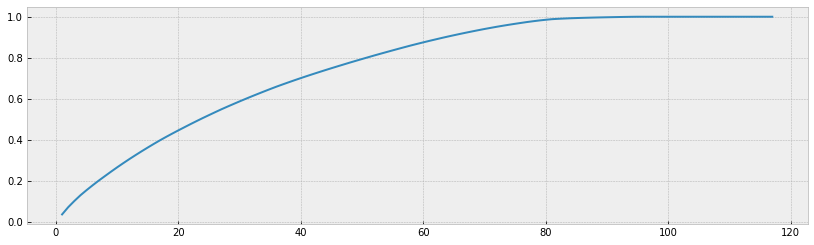

Number features: 82
Total Variance Explained: 0.9912777528494461


In [8]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [9]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9898434995204859

## Hierarchical Agglomerative Clustering

### Finding the Optimum Number of Clusters

In [10]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

C:\Users\SRBaxla\AppData\Local\Temp\ipykernel_5284\3591206986.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


  0%|          | 0/18 [00:00<?, ?it/s]

### Plotting the Evaluation Scores for Different Evaluation Metrics

In [11]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

Max Value:
Cluster #    Cluster Score
2     131.021196

Min Value:
Cluster #     Cluster Score
19      72.764286


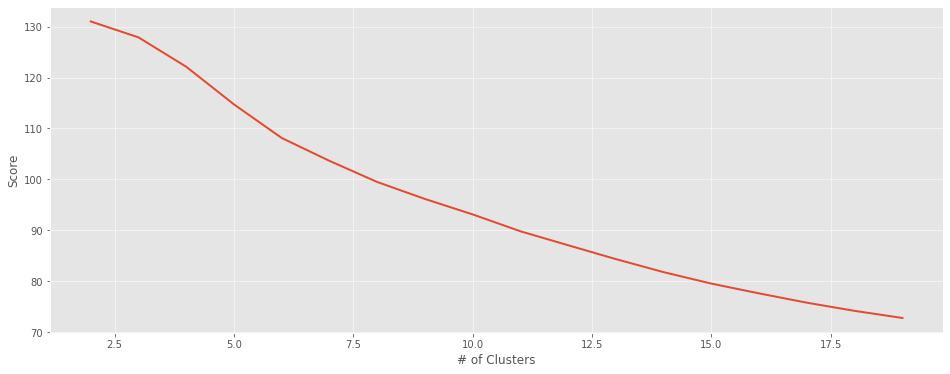

In [12]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

Max Value:
Cluster #     Cluster Score
19       0.048411

Min Value:
Cluster #    Cluster Score
2       0.020172


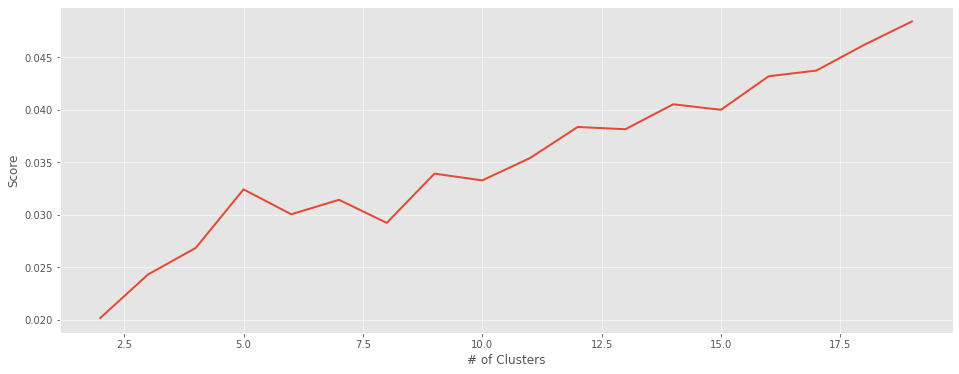

In [13]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

Max Value:
Cluster #    Cluster Score
3       5.606203

Min Value:
Cluster #     Cluster Score
18       3.707613


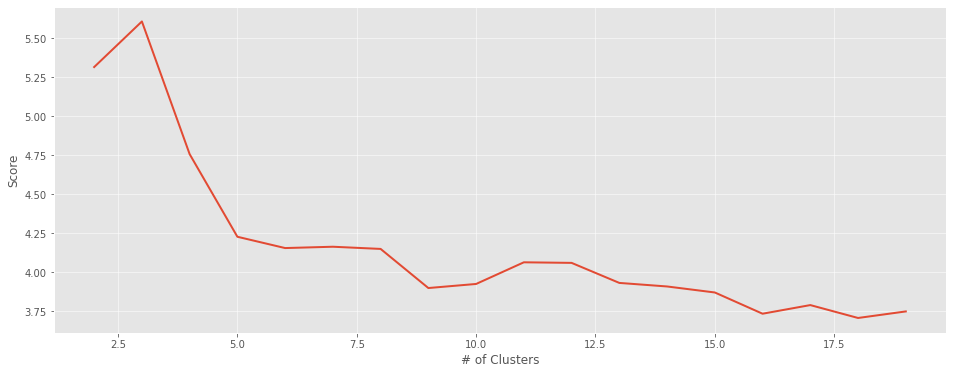

In [14]:
plot_evaluation(db_scores)

Based on two evaluation metrics, the best amount of clusters for this dataset is 12.

## Running the Final Clustering Algorithm

In [15]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [16]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,8.0,1.0,2.0,8.0,4.0,7.0,5.0
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,2.0,1.0,1.0,4.0,5.0,1.0,3.0
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,8.0,2.0,0.0,8.0,7.0,8.0,1.0
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,7.0,3.0,8.0,6.0,2.0,4.0,1.0
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,2.0,9.0,2.0,2.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,5.0,8.0,8.0,0.0,8.0,0.0,0.0
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,9.0,2.0,2.0,8.0,2.0,3.0,2.0
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,6.0,3.0,2.0,8.0,6.0,5.0,8.0
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,8.0,6.0,5.0,3.0,4.0,9.0,4.0


In [17]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,8.0,1.0,2.0,8.0,4.0,7.0,5.0,1
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,2.0,1.0,1.0,4.0,5.0,1.0,3.0,10
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,8.0,2.0,0.0,8.0,7.0,8.0,1.0,5
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,7.0,3.0,8.0,6.0,2.0,4.0,1.0,3
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,2.0,9.0,2.0,2.0,8.0,8.0,8.0,3
...,...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,5.0,8.0,8.0,0.0,8.0,0.0,0.0,4
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,9.0,2.0,2.0,8.0,2.0,3.0,2.0,0
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,6.0,3.0,2.0,8.0,6.0,5.0,8.0,4
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,8.0,6.0,5.0,3.0,4.0,9.0,4.0,11


### Exporting the Clustered Profiles

In [18]:
with open("../clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

## Finding Users within their own Clusters
Sorting users so they match or are recommended to other similar users.

Example will be randomly using any of the clusters:

In [19]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group

For Cluster Group # 0


,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
11,Amateur writer. Internet maven. Food fan. Typical alcoholaholic. Beer ninja.,4.0,7.0,0.0,5.0,0.0,7.0,9.0
26,Amateur writer. Internet maven. Food fan. Typical alcoholaholic. Beer ninja.,1.0,9.0,8.0,3.0,2.0,4.0,8.0
41,Amateur writer. Internet maven. Food fan. Typical alcoholaholic. Beer ninja.,8.0,7.0,4.0,2.0,4.0,4.0,4.0
56,Amateur writer. Internet maven. Food fan. Typical alcoholaholic. Beer ninja.,1.0,1.0,7.0,4.0,1.0,8.0,2.0
71,Amateur writer. Internet maven. Food fan. Typical alcoholaholic. Beer ninja.,6.0,6.0,1.0,9.0,9.0,2.0,9.0
...,...,...,...,...,...,...,...,...
6221,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,2.0,3.0,0.0,2.0,2.0,5.0,2.0
6224,Incurable explorer. Devoted communicator. Subtly charming organizer. Thinker. Beer maven. Avid web specialist. Twitter ninja.,6.0,6.0,1.0,8.0,4.0,9.0,2.0
6226,Amateur organizer. Wannabe beer evangelist. General web fan. Certified internet ninja. Avid reader.,9.0,8.0,5.0,4.0,4.0,6.0,2.0
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,9.0,2.0,2.0,8.0,2.0,3.0,2.0


### Vectorizing the Bios only in the Selected Cluster

In [20]:
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,avid,award,bacon,beer,...,tv,tvaholic,twitter,typical,unapologetic,wannabe,web,winning,writer,zombie
11,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
26,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
41,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
56,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
71,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6224,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
6226,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6236,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
group

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,tv,tvaholic,twitter,typical,unapologetic,wannabe,web,winning,writer,zombie
11,4.0,7.0,0.0,5.0,0.0,7.0,9.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26,1.0,9.0,8.0,3.0,2.0,4.0,8.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
41,8.0,7.0,4.0,2.0,4.0,4.0,4.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
56,1.0,1.0,7.0,4.0,1.0,8.0,2.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
71,6.0,6.0,1.0,9.0,9.0,2.0,9.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,2.0,3.0,0.0,2.0,2.0,5.0,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6224,6.0,6.0,1.0,8.0,4.0,9.0,2.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6226,9.0,8.0,5.0,4.0,4.0,6.0,2.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6236,9.0,2.0,2.0,8.0,2.0,3.0,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Finding Correlation among the Users

In [22]:
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

corr_group

,11,26,41,56,71,86,101,116,131,146,...,6193,6196,6206,6209,6211,6221,6224,6226,6236,6239
11,1.000000,0.783771,0.765839,0.593105,0.763709,0.814821,0.429532,0.751038,0.662806,0.920909,...,0.718791,0.502620,0.830805,0.156449,0.695869,0.725932,0.765931,0.703085,0.589778,0.320632
26,0.783771,1.000000,0.781722,0.697385,0.679758,0.714296,0.725115,0.454711,0.867392,0.925107,...,0.544794,0.450756,0.792678,0.510227,0.725756,0.538176,0.575829,0.709933,0.405625,0.700371
41,0.765839,0.781722,1.000000,0.590081,0.783975,0.818596,0.666041,0.643289,0.598609,0.766491,...,0.489656,0.591847,0.810528,0.467872,0.646076,0.648372,0.761130,0.940649,0.705672,0.566650
56,0.593105,0.697385,0.590081,1.000000,0.443295,0.545996,0.619417,0.767849,0.854204,0.726115,...,0.793891,0.701980,0.707148,0.528836,0.803786,0.563160,0.664980,0.633295,0.485239,0.651789
71,0.763709,0.679758,0.783975,0.443295,1.000000,0.971014,0.736038,0.610757,0.512032,0.706556,...,0.568003,0.717125,0.717477,0.434664,0.773513,0.594800,0.735528,0.709294,0.709438,0.321249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,0.725932,0.538176,0.648372,0.563160,0.594800,0.682681,0.298703,0.754032,0.454662,0.707555,...,0.671293,0.671612,0.757359,0.346330,0.672001,1.000000,0.807711,0.706023,0.669186,0.261893
6224,0.765931,0.575829,0.761130,0.664980,0.735528,0.845975,0.421371,0.866965,0.456648,0.699802,...,0.744361,0.813629,0.789224,0.418932,0.776723,0.807711,1.000000,0.840524,0.786759,0.445608
6226,0.703085,0.709933,0.940649,0.633295,0.709294,0.786610,0.580808,0.681982,0.532900,0.701116,...,0.531830,0.697839,0.833121,0.463970,0.722740,0.706023,0.840524,1.000000,0.772941,0.607524
6236,0.589778,0.405625,0.705672,0.485239,0.709438,0.744842,0.498484,0.674722,0.326862,0.426294,...,0.510442,0.662837,0.830660,0.210700,0.640703,0.669186,0.786759,0.772941,1.000000,0.425985


## Finding the Top 10 Similar users
For a random dating profile

In [23]:
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 5076 

          5076
4037  0.920937
1572  0.919658
978   0.904178
4986  0.891563
764   0.890361
335   0.887691
4114  0.876103
5999  0.874066
2477  0.873707
1158  0.872534

The most similar user to User # 5076 is User # 4037
